<a href="https://colab.research.google.com/github/TabithaWKariuki/Machine-Learning-Week-2/blob/main/Machine_Learning_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hass Consulting Company

## 1. Defining the Question

### a) Specifying the Question

As a Data Scientist to Consulting company you have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

### b) Defining the Metric for Success

Create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

### c) Understanding the context 

Real estate is real property that consists of land and improvements, which include buildings, fixtures, roads, structures, and utility systems. Property rights give a title of ownership to the land, improvements, and natural resources such as minerals, plants, animals, water, etc.



### d) Recording the Experimental Design

1. Define the question, the metric for success, the context, experimental design taken.
2. Read and explore the given dataset.
3. Define the appropriateness of the available data to answer the given question.
4. Find and deal with outliers, anomalies, and missing data within the dataset.
5. Perform univariate, bivariate and multivariate analysis recording your observations.
6. Performing regression analysis.
7. Incorporate categorical independent variables into your models.
8. Check for multicollinearity
9. Provide a recommendation based on your analysis. 
10. Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
11.Challenge your solution by providing insights on how you can make improvements in model improvement.

### e) Data Relevance

The dataset [link text](http://bit.ly/IndependentProjectWeek7Dataset) has appropriate columns and data to answer the questions. They are both relevant for our analysis.

The dataset consists of information on  factors that affect housing prices over the past few months, therefore suitable to create a model that will be used to predict the results

## 2. Importing all libraries

In [ ]:
#import the neccessary libraries 

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy as sp

import statsmodels.formula.api as smf
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")


## 3. Reading the Data

In [ ]:
# Loading the Dataset and previewing

house=pd.read_csv('house_data.csv')


## 4. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
#

house.shape

(21613, 20)

In [ ]:
# Previewing the top of our dataset
#

house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Previewing the bottom of our dataset
# 

house.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
# Checking whether each column has an appropriate datatype
#

house.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
# checking the general information of our dataset.

house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

## 5. External Data Source Validation

I made sure my data matches something outside of the dataset link. The measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset.

## 6. Tidying the Dataset

In [ ]:
# Identifying the Missing Data

house.isnull().sum()

# Our data has no missing values

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# Checking for duplicates

house.duplicated().sum()

3

In [ ]:
#dropping the duplicates

house.drop_duplicates(keep = False, inplace = True)

In [ ]:
# confirming the drop of duplicates

house.duplicated().any()

False

In [ ]:
# listing our column names

house.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

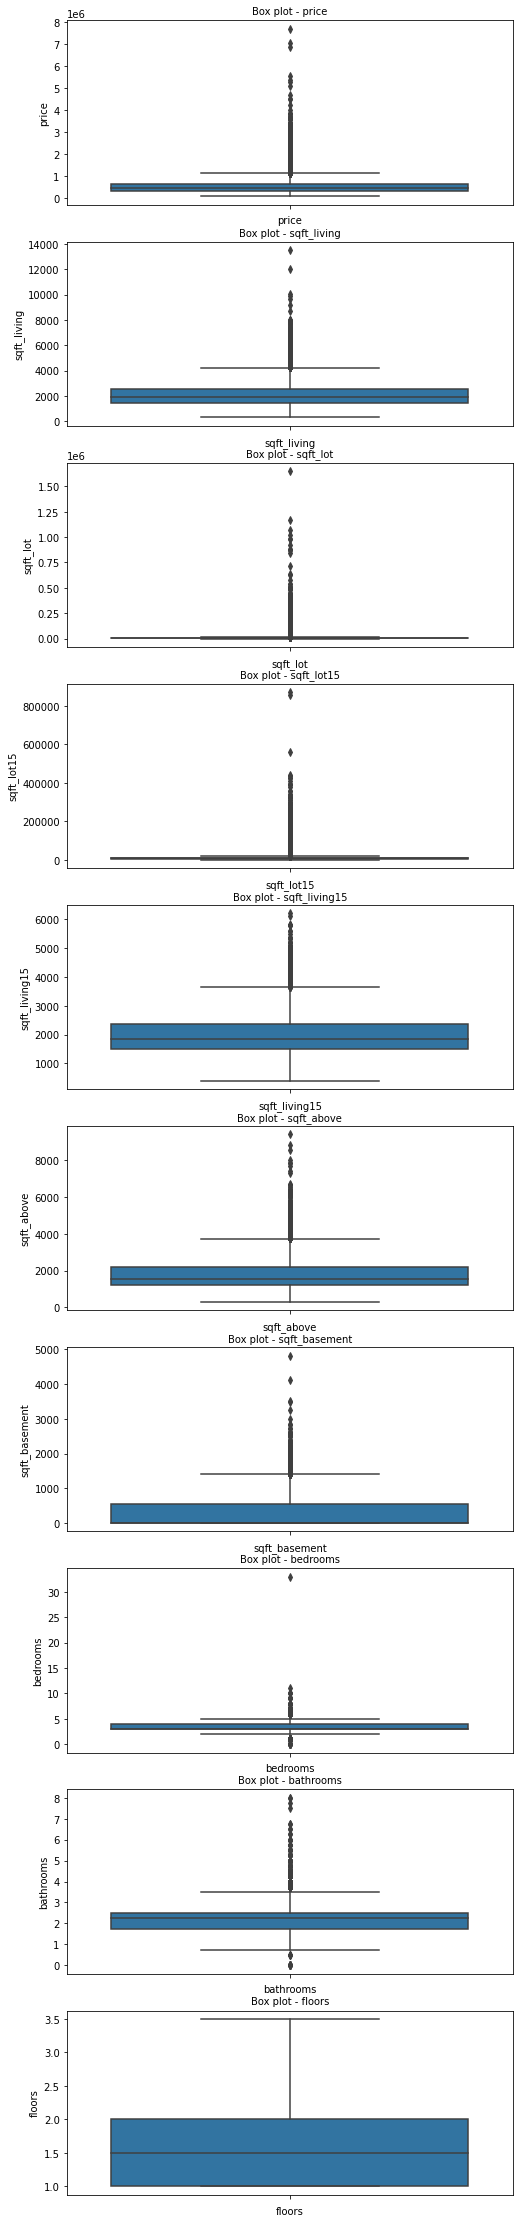

In [ ]:
# Checking for Outliers for the following selected factors.

col = ['price','sqft_living','sqft_lot', 'sqft_lot15', 'sqft_living15', 'sqft_above', 'sqft_basement', 'bedrooms', 'bathrooms', 'floors']

fig,ax = plt.subplots(len(col),figsize=(8,40))
for i , col_val in enumerate(col):
  sns.boxplot(y=house[col_val],ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize =10)
  ax[i].set_xlabel(col_val,fontsize=10)
plt.show()

In [ ]:
# dealing with outliers using quantiles
Q1 = house.quantile(0.25)
Q3 = house.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
df = house[~((house < (Q1 - 1.5 * IQR)) | (house > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(df.shape)

# Printing the shape of our old dataset
print(house.shape)

(14934, 20)
(21607, 20)


I will not be dropping the outliers since it causes a very high reduction in our data.

In [ ]:
# Creating new dataframe with relevant columns
hass=house[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15']]

hass.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639


In [ ]:
# we use the to_csv function to create a csv file with the name example 
# and export it

hass.to_csv('housing.csv')

In [ ]:
# Loading and reading the data from our CSV
# Creating a new dataframe df1 and checking its shape

housing=pd.read_csv('housing.csv')

housing.shape

(21607, 18)

## 7. Exploratory Analysis

Univariate Analysis

In [ ]:
# Getting summary statistics for the data

housing.describe()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,21607.000000,2.160700e+04,21607.000000,21607.000000,21607.000000,2.160700e+04,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000
mean,10805.392003,5.401757e+05,3.370852,2.114720,2079.862683,1.510961e+04,1.494169,0.007544,0.234091,3.409451,7.656685,1788.305086,291.557597,1971.002083,84.242421,98077.951543,1986.484889,12769.608460
std,6239.033917,3.674129e+05,0.930158,0.770244,918.559712,4.142594e+04,0.539998,0.086529,0.765955,0.650785,1.175542,828.186477,442.618358,29.371866,401.319142,53.505719,685.460263,27307.765664
min,0.000000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,5403.500000,3.215000e+05,3.000000,1.750000,1423.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,10805.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,16208.500000,6.450000e+05,4.000000,2.500000,2550.000000,1.069200e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,21612.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


In [ ]:
# Frequencies of bedrooms.

housing['bedrooms'].value_counts()

3     9820
4     6880
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Most houses have have 3 bedrooms

In [ ]:
# Frequencies of bedrooms.

housing['bathrooms'].value_counts()

2.50    5376
1.00    3852
1.75    3046
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

5376 houses have 2.5 bathrooms while one house has 7.75 bathrooms.

In [ ]:
# Frequencies of bedrooms.

housing['view'].value_counts()

0    19485
2      963
3      508
1      332
4      319
Name: view, dtype: int64

19485 houses have no view

In [ ]:
# Frequencies of bedrooms.

housing['waterfront'].value_counts()

0    21444
1      163
Name: waterfront, dtype: int64

21,444 houses have no waterfront

In [ ]:
# Checking the skewness of our variable

housing.skew()

Unnamed: 0        0.000086
price             4.021219
bedrooms          1.974188
bathrooms         0.511221
sqft_living       1.471509
sqft_lot         13.058321
floors            0.616868
waterfront       11.383491
view              3.397995
condition         1.032772
grade             0.771491
sqft_above        1.446851
sqft_basement     1.577664
yr_built         -0.469840
yr_renovated      4.554459
zipcode           0.405405
sqft_living15     1.108399
sqft_lot15        9.505516
dtype: float64

In [ ]:
# Checking the kurtosis of our variables

housing.kurt()

Unnamed: 0        -1.199816
price             34.512431
bedrooms          49.056563
bathrooms          1.279372
sqft_living        5.241353
sqft_lot         285.003423
floors            -0.483768
waterfront       127.595686
view              10.911228
condition          0.525613
grade              1.191248
sqft_above         3.401713
sqft_basement      2.714197
yr_built          -0.657006
yr_renovated      18.746363
zipcode           -0.853729
sqft_living15      1.596922
sqft_lot15       150.723440
dtype: float64

In [ ]:
# Checking the variance of our variables

housing.var()

Unnamed: 0       3.892554e+07
price            1.349923e+11
bedrooms         8.651931e-01
bathrooms        5.932762e-01
sqft_living      8.437519e+05
sqft_lot         1.716109e+09
floors           2.915979e-01
waterfront       7.487288e-03
view             5.866874e-01
condition        4.235208e-01
grade            1.381898e+00
sqft_above       6.858928e+05
sqft_basement    1.959110e+05
yr_built         8.627065e+02
yr_renovated     1.610571e+05
zipcode          2.862862e+03
sqft_living15    4.698558e+05
sqft_lot15       7.457141e+08
dtype: float64

Bivariate Analysis

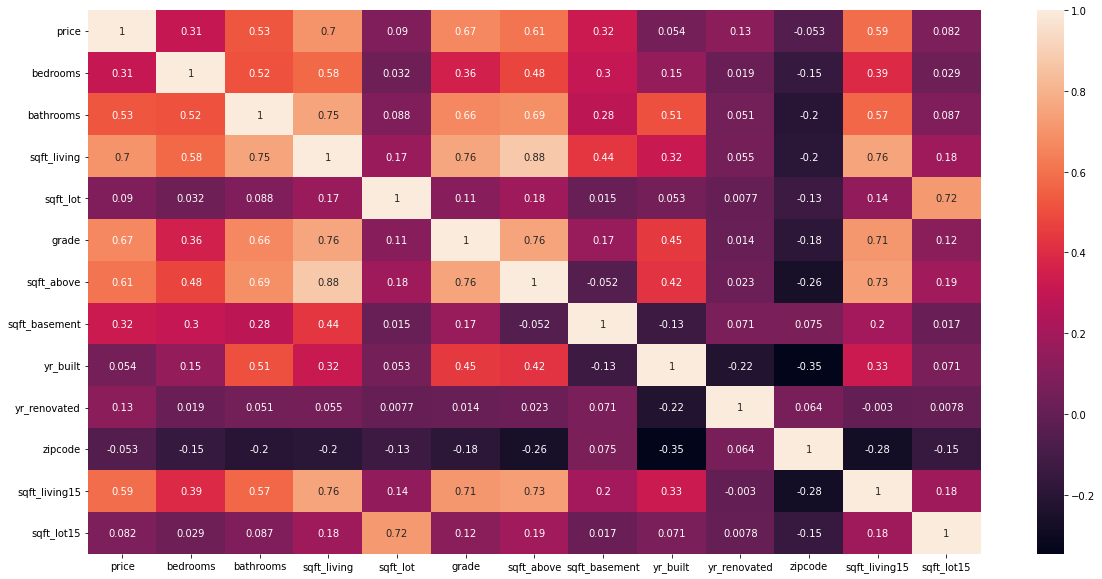

In [ ]:
# heatmap to show correlation between variables

col=housing[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15']]

corr = col.corr() 
plt.figure(figsize = (20,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()

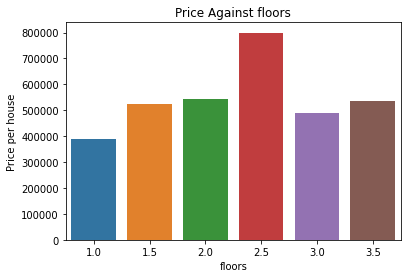

In [ ]:
# Showing price vs floors

ax = sns.barplot(x = 'floors', y = 'price', data=housing, ci=None, estimator=np.median)
ax.set(xlabel='floors',
       ylabel='Price per house',
       title='Price Against floors')
plt.show()

Houses with 2.5 floors have the highest prices

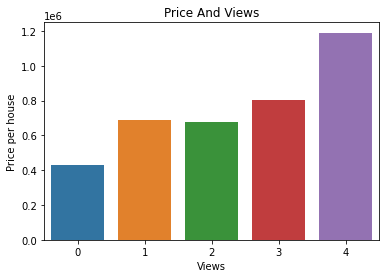

In [ ]:
# Showing price vs views

ax = sns.barplot(x = 'view', y = 'price', data=housing, ci=None, estimator=np.median)
ax.set(xlabel='Views',
       ylabel='Price per house',
       title='Price And Views')
plt.show()

Houses with more than 3 views had the highest price.

Multivariate Analysis

In [ ]:
#splitting our data 
X=housing[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'grade',  'sqft_basement', 'yr_built',
       'zipcode', 'sqft_living15', 'sqft_lot15']]
y=housing['price']

In [ ]:
# dividing the data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# performing feature scaling.

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Getting rid of the infinite values

housing.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
# Perfroming LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
# Training and making predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluating the performance

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy0.012494215640906987


Accuracy level is 1.25%, which is very low.

## 7. Implementing the Solution

Multi-Linear Regression

In [ ]:
# Splitting our data 

X=housing[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'grade',  'sqft_basement', 'yr_built',
       'zipcode', 'sqft_living15', 'sqft_lot15']]
y=housing['price']

In [ ]:
# Train using 80% of the data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Finding optimal coefficients and intercept

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Assessing the accuracy of the model

y_pred = regressor.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()

,Actual,Predicted
count,4.322000e+03,4.322000e+03
mean,5.342763e+05,5.406572e+05
std,3.459687e+05,2.865538e+05
min,8.100000e+04,-5.610573e+05
25%,3.201500e+05,3.373735e+05
50%,4.500000e+05,4.901603e+05
75%,6.400000e+05,6.823404e+05
max,6.890000e+06,2.709779e+06


In [ ]:
# Calculating the MAE,MSE, and RMSE

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 142323.23218428972
Mean Squared Error: 47308950956.642975
Root Mean Squared Error: 217506.20900710623


The Rmse score of 217506.20900710623 is bigger than mean,hence its not a very good model.

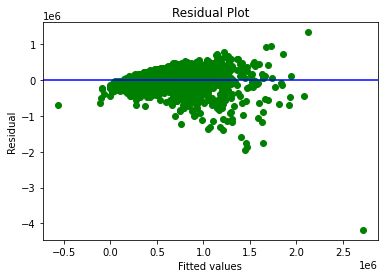

In [ ]:
# Bartlett's test

residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='green')
plt.title('Residual Plot')
plt.ylabel('Residual')
plt.xlabel('Fitted values')
plt.axhline(y= residuals.mean(), color='blue')
plt.show()

If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data.

In [ ]:
# Heteroskedacity
# Finding the p value

import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

#finding the critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

#if test_result > critical_value we reject the null hypothesis
#
if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


The assumption is that any distribution or comparison of distributions shares the same level of variance within the selected group of data points.

In [ ]:
housing.dtypes

Unnamed: 0         int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
# we then import label encoder to convert our floats to integers

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

housing['price']=lb.fit_transform(housing['price'].astype(int))
housing['bathrooms']=lb.fit_transform(housing['bathrooms'].astype(int))
housing['floors']=lb.fit_transform(housing['floors'].astype(int))

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# We will use 5 independent variables for this
X=housing[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'grade',  'sqft_basement', 'yr_built',
       'zipcode', 'sqft_living15', 'sqft_lot15']].values
y=housing['price'].values

folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RMSE of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 628.7753103150891

Training model 2
Model 2 Root Mean Squared Error: 637.0013373076818

Training model 3
Model 3 Root Mean Squared Error: 619.6027357023515

Training model 4
Model 4 Root Mean Squared Error: 624.3118732527

Training model 5
Model 5 Root Mean Squared Error: 617.7689980778772


In [ ]:
np.mean(RMSES)

625.4920509311398

The average is fairly close to our initial values

Quantile Regression

In [ ]:
# Preparing the data

variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'grade',  'sqft_basement', 'yr_built',
       'zipcode', 'sqft_living15', 'sqft_lot15']

for i,colval in enumerate(variables):
  x = np.array(housing[colval].values.reshape(-1,1))
  Y = np.array(housing['price'])

 # We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Dividing our data into training and test sets
# ---
# 
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=10)

# Finding the regression coefficients for the conditioned median, 0.5 quantile

mod = smf.quantreg('Y ~ x', housing)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      Y   Pseudo R-squared:             0.005025
Model:                       QuantReg   Bandwidth:                       171.3
Method:                 Least Squares   Sparsity:                        2924.
Date:                Sat, 11 Jun 2022   No. Observations:                21607
Time:                        12:36:57   Df Residuals:                    21605
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1643.0278     10.981    149.626      0.000    1621.504    1664.551
x              0.0036      0.000      9.852      0.000       0.003       0.004

The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.


In [ ]:
# Similarly we can do the models for other quantiles

quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

    qt    intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1   440.484758  0.002933        0.002449        0.003418
1  0.2   751.116886  0.003370        0.002600        0.004139
2  0.3  1049.946163  0.003662        0.002951        0.004373
3  0.4  1336.002089  0.003850        0.003057        0.004644
4  0.5  1643.027833  0.003589        0.002875        0.004303
5  0.6  1947.642537  0.003797        0.003073        0.004521
6  0.7  2270.190557  0.004145        0.003470        0.004821
7  0.8  2682.148192  0.003548        0.002958        0.004139
8  0.9  3177.804935  0.002680        0.002213        0.003147


Mean squared error: 948406.50
Variance score: 0.01


Text(0.5, 1.0, 'predictors of price')

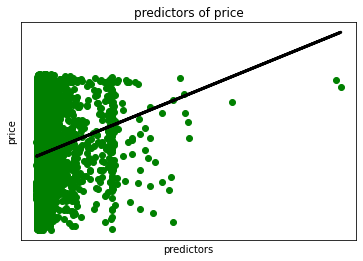

In [ ]:
# Let's now trying to fit a linear regression

mod = LinearRegression(fit_intercept = True, normalize = False)
mod.fit(x,Y)

Y_predict = mod.predict(x)


print("Mean squared error: {0:.2f}"
    .format(np.mean((Y_predict - Y) ** 2)))
print('Variance score: {0:.2f}'.format(mod.score(x, Y)))

# With a low variance score of 0.50, it means that our linear regression 
# did not do a good job. 
plt.figure(2)
plt.scatter(x, Y,  color='green')
plt.plot(x, Y_predict, color='black',
         linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel("predictors")
plt.ylabel("price")
plt.title("predictors of price")

The mean squared error of my Quantile regression is 948406 while that of linear regression is 47308950956.642975.

In [ ]:
## Let us now plot 0.1th, 0.5th and 0.9th quantile models against our original data.
# 
plt.figure(5)
plt.scatter(x_, y_,  color='black')
plt.plot(x_, y_pred2, color='blue',
         linewidth=3, label='Lin Reg')

y_pred3 = models[0].params['Intercept'] + models[0].params['x'] * x_
plt.plot(x_, y_pred3, color='red',
         linewidth=3, label='Q Reg : 0.1')

y_pred4 = models[4].params['Intercept'] + models[4].params['x'] * x_
plt.plot(x_, y_pred4, color='green',
         linewidth=3, label='Q Reg : 0.5')


y_pred5 = models[8].params['Intercept'] + models[8].params['x'] * x_
plt.plot(x_, y_pred5, color='cyan',
         linewidth=3, label='Q Reg : 0.9')

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Quantile regression on data with non-constant variance")
plt.legend()

Ridge Regression

In [ ]:
housing.columns

Index(['Unnamed: 0', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
# Setting up our X and y datasets
#
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'grade',  'sqft_basement', 'yr_built',
       'zipcode', 'sqft_living15', 'sqft_lot15']]
y = df['price']

In [ ]:
# Creating our baseline regression model
# This is a model that has no regularization to it
# 
regression = LinearRegression()
regression.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)

# The output  value of 16353629668.169182 will be our indicator to determine if the 
# regularized ridge regression model is superior or not.

16353629668.169182


In [ ]:
# In order to create our ridge model we need to first determine the most appropriate value for the l2 regularization. 
# L2 is the name of the hyperparameter that is used in ridge regression. 
# Determining the value of a hyperparameter requires the use of a grid. 
# In the code below, we first create our ridge model and indicate normalization in order to get better estimates. 
# Next we setup the grid that we will use. 
# The search object has several arguments within it. Alpha is hyperparameter we are trying to set. 
# The log space is the range of values we want to test. 
# We want the log of -5 to 2, but we only get 8 values from within that range evenly spread out. 
# Are metric is the mean squared error. Refit set true means to adjust the parameters while modeling 
# and cv is the number of folds to develop for the cross-validation. 
#
ridge = Ridge(normalize=True)

search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
 
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

16486074218.840582

The best_params_ tells us what to set alpha too which in this case is 0.01. 
The best_score_ tells us what the best possible mean squared error is. 
In this case, the value of 16486074218.840582 is slightly higher than what the baseline model was. 

In [ ]:
# We can confirm this by fitting our model with the ridge information and 
# finding the mean squared error below

ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

16356761032.725769


These results indicate that there is little difference between the ridge and baseline models. 

In [ ]:
# This is confirmed with the coefficients of each model found below.

coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,housing.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'Unnamed: 0': -14736.655375108208,
 'bathrooms': -3.6990892508420075,
 'bedrooms': 74.46254375549688,
 'condition': 58.8992428686679,
 'floors': 31.557577567747103,
 'grade': -5.454825145186987,
 'price': 20265.055662993807,
 'sqft_living': 24805.428647736273,
 'sqft_lot': 99396.92319534799,
 'view': 22.232675764589715,
 'waterfront': -2860.8735972029376}

The coefficient values are about the same. This means that the penalization made little difference with this dataset.

Lasso Regression

In [ ]:
# Before building the models, let's first scale data. 
# Lasso put constraints on the size of the coefficients associated to each variable. 
# But, this value depends on the magnitude of each variable and it is therefore 
# necessary to center and reduce, or standardize, the variables.
# 

# Importing StandardScaler
#
from sklearn.preprocessing import StandardScaler

# Creating features and target matrixes
#
X = housing[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'grade', 'sqft_basement', 'yr_built',
       'zipcode', 'sqft_living15', 'sqft_lot15']]
y = housing[['price']]

# Scaling data 


scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
# We can basically build the Lasso model. 
# But for now, we will train it on the whole dataset and look at an R-squared score and on the model coefficients. 
# Note, that we are not setting the alpha, it is defined as 1.
# 

# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.5949735752779508
lasso MSE: 387451.0760919876
lasso coef: [  -5.97974426   53.66457441  130.26263306   23.29673647  133.84772327
  467.21271434   85.96313327 -319.38692771   38.96347588  189.84147581
  -15.0157687 ]


In [ ]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.
# Making necessary imports, split data into training and test sets, and choose a set of parameters 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients

gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 0.6}
lasso score: 0.5997627629418161
linear score: 0.5996175428391852
lasso MSE: 385066.61732333293
linear MSE: 385206.3329932151
lasso best estimator coef: [  -5.65378587   51.15336319  132.13664221   33.32358202  141.46564771
  471.35460565   88.43400016 -327.46226933   35.97505746  186.13006609
  -23.86637267]
linear coef: [[  -7.09083384   51.70399264  132.25822245   35.96646374  142.72968764
   471.42631983   89.1805789  -328.92674374   36.24422341  186.98886144
   -26.40413224]]


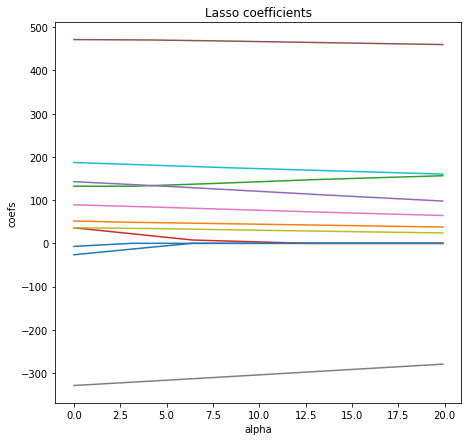

In [ ]:
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array

alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots

plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

Elastic Net Regression

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)

In [ ]:
# Creating our linear regression model for the purpose of comparison

regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model) 

# This mean standard error score of 387432.5609520453 is our benchmark for determining 
# if the elastic net model will be better or worst

387432.5609520453


In [ ]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.

coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,housing.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'Unnamed: 0': array([  -8.42352148,   54.63312743,  130.45758698,   26.81701779,
         135.94575748,  467.35490451,   87.21816997, -321.84455786,
          39.38064428,  191.25261562,  -18.62124146])}

In [ ]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 

from sklearn.linear_model import ElasticNet
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# We will now fit our model and display the best parameters 
# and the best results we can get with that setup.

search.fit(X,y)
search.best_params_
abs(search.best_score_)

391285.6216551523

In [ ]:
# The best hyperparameters was an alpha set to 0.001 and a l1_ratio of 0.8. 
# With these settings we got an MSE of 391285.6216551523. This is above our baseline model of MSE 387432.5609520453
# for the baseline model. 
# Which means that elastic net is doing worse than linear regression. 
# For clarity, we will set our hyperparameters to the recommended values and run on the data.

elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

655702.8471839284


In [ ]:
# Below are the coefficients
# 

coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,housing.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficients are mostly the same. 
# Notice that 'sqft_basement', 'yr_built','zipcode', 'sqft_living15', 'sqft_lot15 
# was completely removed from the model in the elastic net version. 
# This means that this values were not good to the algorithm. Traditional regression cannot do this.

{'Unnamed: 0': 30.57796760418896,
 'bathrooms': 9.161616751329108,
 'bedrooms': 71.34738018934104,
 'condition': 67.20923785249808,
 'floors': 33.10960125608391,
 'grade': 7.095279259894276,
 'price': 46.91683861323843,
 'sqft_living': 27.657913888293326,
 'sqft_lot': 78.7171568630245,
 'view': 4.661390816595486,
 'waterfront': -7.633570100391541}

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?